In [101]:
import numpy as np
import matplotlib as mp
import matplotlib.pylab as pylab
import matplotlib.pyplot as plot
import sys
sys.path.append("/Users/simsong/gits/stats_2010")
import ctools.tydoc as tydoc
from tydoc import tytable

MAX_AGE = 110

In [102]:
def get_range(frac, vals):
    ct = len(vals)
    vals = list(sorted(vals))
    delta = (1-frac)/2
    v1 = vals[int( ct * delta ) ]
    v2 = vals[int( ct * (1-delta))]
    return (v1,v2)

def print_stats(desc,vals):
    ct = len(vals)
    vals = list(sorted(vals))
    for frac in [.95, .99]:
        (v1,v2) = get_ranges(frac, vals)
        print(f"{desc} {frac*100}%: {v1:.02f} → {v2:.02f}  "
              f"(median: {(v2+v1)/2:.02f} range: {v2-v1:.02f})")

def print_experiment_stats(epsilon,n,avg,counts,ages):
    print(f"Epsilon: {epsilon}")
    print(f"Num people: {n} all of age: {avg}")
    print_stats("count of people:", counts)
    print_stats("average ages", ages)
    print("")

    
def naive_stats(epsilon, n, age):
    # Differentially private count and average where people all have the same value
    n_sensitivity = 1 
    n_noise    = np.random.laplace(scale=([n_sensitivity/(epsilon*.5)]))
    private_n = n + n_noise
    age_sensitivity = 110 
    age_noise = np.random.laplace(scale=([age_sensitivity/(epsilon*.5)]))
    private_sum_ages = (age*n) + age_noise
    private_average_age = private_sum_ages / private_n
    return {'num_private':private_n,'average_age':average_age}

    
def dp_age_histogram(epsilon, npeople, age, verbose=False):
    # Given a value of epsilon, and a count of people all the same age
    # create a histogram and then calc average age and the like
    bins = np.array([0]*(MAX_AGE+1))
    bins[age] = npeople
    noises   = np.random.laplace(scale=([1/epsilon] * (MAX_AGE+1)))
    private_bins = bins + noises
    num_private = sum(private_bins)
    total_age = sum([(n * count) for (n,count) in enumerate(bins)]) 
    average_age = total_age / num_private
    if verbose:
        print(f"Epsilon: {epsilon}")
        print(f"Num people: {npeople} age: {age}")
        print(f"Real histogram: {bins}")
        print(f"Noises: {noises}")
        print(f"Private histogram: {private_bins}")
        print(f"private[{age}] = {private_bins[age]}")
        print(f"Num private people: {num_private}")
        print(f"Average age: {average_age}")
        print("")
    return {'num_private':num_private,'average_age':average_age}

def run_histogram_experiment(epsilon,n,age,trials, verbose=False):
    results        = [dp_age_histogram(epsilon,n,age, verbose=verbose) for i in range(trials)]
    private_counts = [result['num_private'] for result in results]
    private_average_ages = [result['average_age'] for result in results]
    print_experiment_stats(epsilon, n, age, private_counts, private_average_ages)
    return {'epsilon':epsilon,
            'n':n,
            'age':age,
            'trials':trials,
            'private_avgage-.95'   : get_range(.95, private_average_ages),
            'private_counts-.95'   : get_range(.95, private_counts),
            'private_avgage-.25'   : get_range(.25, private_average_ages),
            'private_counts-.25'   : get_range(.25, private_counts)}

run_histogram_experiment(2.0, 100, 22, trials=1000, verbose=False)

Epsilon: 2.0
Num people: 100 all of age: 22
count of people: 95.0%: 85.67 → 114.33  (median: 100.00 range: 28.67)
count of people: 99.0%: 82.42 → 120.46  (median: 101.44 range: 38.04)
average ages 95.0%: 19.27 → 25.71  (median: 22.49 range: 6.44)
average ages 99.0%: 18.39 → 27.31  (median: 22.85 range: 8.93)



{'epsilon': 2.0,
 'n': 100,
 'age': 22,
 'trials': 1000,
 'private_avgage-.95': (19.269152487581685, 25.71184211636944),
 'private_counts-.95': (85.66565430404654, 114.3336720553227),
 'private_avgage-.25': (21.495347522609094, 22.563093727685363),
 'private_counts-.25': (97.50600339417579, 102.35318191352135)}

Epsilon: 20.0
Num people: 1 all of age: 22
count of people: 95.0%: -0.46 → 2.47  (median: 1.00 range: 2.93)
count of people: 99.0%: -0.93 → 2.93  (median: 1.00 range: 3.86)
average ages 95.0%: -168.63 → 215.53  (median: 23.45 range: 384.16)
average ages 99.0%: -927.62 → 940.20  (median: 6.29 range: 1867.82)

Epsilon: 20.0
Num people: 10 all of age: 22
count of people: 95.0%: 8.55 → 11.46  (median: 10.00 range: 2.91)
count of people: 99.0%: 8.07 → 11.93  (median: 10.00 range: 3.86)
average ages 95.0%: 19.20 → 25.74  (median: 22.47 range: 6.54)
average ages 99.0%: 18.44 → 27.25  (median: 22.84 range: 8.81)

Epsilon: 20.0
Num people: 100 all of age: 22
count of people: 95.0%: 98.54 → 101.46  (median: 100.00 range: 2.92)
count of people: 99.0%: 98.06 → 101.91  (median: 99.99 range: 3.85)
average ages 95.0%: 21.68 → 22.33  (median: 22.01 range: 0.64)
average ages 99.0%: 21.59 → 22.44  (median: 22.01 range: 0.85)

Epsilon: 20.0
Num people: 1000 all of age: 22
count of people: 95.0%: 998.54 →

(-10, 100)

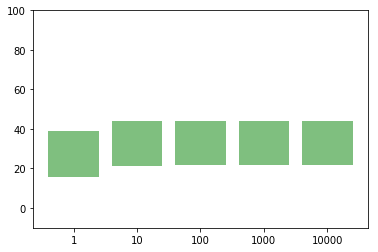

In [114]:
labels   = []
ages25 = []
ages75 = []
age = 22
epsilon = 20.0
for n in [1, 10, 100, 1000, 10000]:
    obj = run_histogram_experiment(epsilon, n, age, trials=100000, verbose=False)
    labels.append(str(n))
    ages25.append(obj['private_avgage-.25'][0])
    ages75.append(obj['private_avgage-.25'][1])

print("labels:",labels)
ax = plt.subplot(111)
ax.bar(x=labels,bottom=ages25, height=ages75, color='green', alpha=0.5)
ax.set_ylim(bottom=-10,top=100)
    

In [73]:
help(pylab.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

In [52]:
for epsilon in [100]:
    for n in [1, 10, 100]:
        #run_naive_experiment(epsilon, n, 22, 1000)
        run_histogram_experiment(epsilon, n, 22, 10000)
        print("=========================")

Epsilon: 100
Num people: 1 all of age: 22
count of people: 95.0%: 0.71 → 1.30  (0.58)
count of people: 99.0%: 0.62 → 1.40  (0.78)
average ages 95.0%: 16.98 → 30.88  (13.90)
average ages 99.0%: 15.74 → 35.75  (20.00)

Epsilon: 100
Num people: 10 all of age: 22
count of people: 95.0%: 9.70 → 10.29  (0.59)
count of people: 99.0%: 9.60 → 10.39  (0.78)
average ages 95.0%: 21.38 → 22.67  (1.29)
average ages 99.0%: 21.18 → 22.92  (1.73)

Epsilon: 100
Num people: 100 all of age: 22
count of people: 95.0%: 99.70 → 100.29  (0.59)
count of people: 99.0%: 99.60 → 100.38  (0.78)
average ages 95.0%: 21.94 → 22.07  (0.13)
average ages 99.0%: 21.92 → 22.09  (0.17)



In [ ]:
pylab.bar(['dogs','cats','ticks'],[1,2,3])

In [ ]:
from IPython.core.display import HTML
display(HTML("<b>bold</b>"))

In [ ]:
import tydoc,io

In [ ]:
a = tydoc.tytable()
a.add_head(['one','two'])
a.add_data([1,2])
i = io.StringIO()
a.render(i,format='html')
i.seek(0)
display(HTML(i.read()))